<a href="https://colab.research.google.com/github/Yug-Oswal/DS/blob/main/EDA(iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing and setting up kaggle for downloading iris dataset
from google.colab import files
import os
import shutil

uploaded = files.upload()

# Defining path
fname = list(uploaded.keys())[0]

path = os.path.join(f'{os.getcwd()}', f'{fname}')

# Moving to /root/.kaggle/kaggle.json

topath = os.path.join('/root', '.kaggle')
try:
  os.makedirs(topath)
except FileExistsError:
  pass

shutil.move(path, os.path.join(topath, 'kaggle.json'))

Saving kaggle.json to kaggle.json


'/root/.kaggle/kaggle.json'

In [4]:
# Importing kaggle now that kaggle api is set up; Warning ignored bcuz it is a virtual env
import kaggle

In [5]:
# Downloading the dataset
!kaggle datasets download -d uciml/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 11.0MB/s]


In [6]:
# Changing perms due to repeated warnings
!chmod 600 "{os.path.join(topath, 'kaggle.json')}"

In [8]:
# Defining dataset zip path and Extracting
import zipfile
zip_ref = zipfile.ZipFile('/content/iris.zip')
zip_ref.extractall('/content/iris')
zip_ref.close()

# Checking contents
os.listdir('/content/iris')

['Iris.csv', 'database.sqlite']

In [9]:
# Defining path to dataset
iris_path = os.path.join('/content/iris', 'Iris.csv')

In [10]:
# Importing required libs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [18]:
# Creation of the dataframe object
iris = pd.read_csv(iris_path)

In [19]:
# Checking features, datapoints, etc
print(iris.shape)

(150, 6)


In [20]:
# Checking features and labels
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [21]:
# Checking id column
print(iris['Id'].value_counts())

1      1
95     1
97     1
98     1
99     1
      ..
51     1
52     1
53     1
54     1
150    1
Name: Id, Length: 150, dtype: int64


In [22]:
# Id feature column is redundant; therefore dropping
iris = iris.drop('Id', axis = 1)

In [23]:
# Species identified as labels; Checking values
print(iris['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


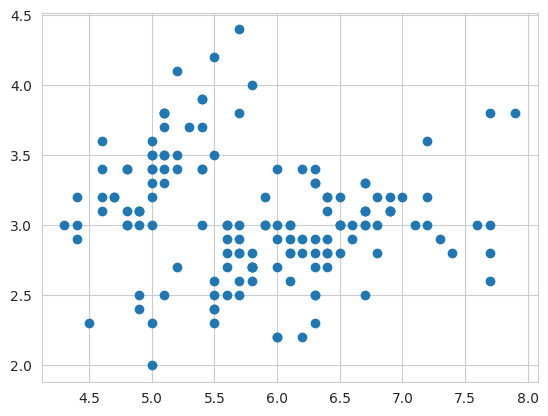

In [34]:
# 2D Scatter Plot
plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'])

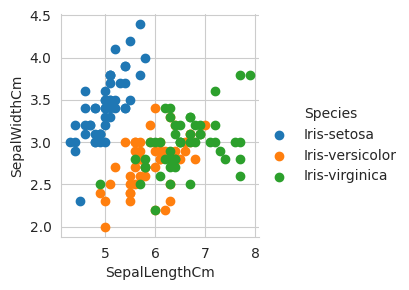

In [41]:
# Colouring the scatterplot
sns.set_style("whitegrid")
grid = sns.FacetGrid(iris, hue = 'Species')
grid.map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')
grid.add_legend()
plt.show()